### Import Relevant Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#Supressing Scientific Notation
pd.options.display.float_format = '{:20,.2f}'.format

### Loading the Data

In [2]:
raw_data = pd.read_csv('data.csv')
raw_data.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


### Checking Missing Values

In [3]:
raw_data.isna().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

In [7]:
raw_data[raw_data['author'].isna()]

,title,author,date,views,likes,link
3039,Year In Ideas 2015,NaN,December 2015,532,15,https://ted.com/talks/year_in_ideas_2015


Note : This talk has multiple speakers. Thats why the value is NaN

### Checking Duplicate Values

In [4]:
len(raw_data[raw_data.duplicated() == True])

0

### Checking Each Columns Datatypes

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [13]:
raw_data.describe()

,views,likes
count,"5,440.00","5,440.00"
mean,"2,061,575.96","62,607.62"
std,"3,567,097.77","107,646.77"
min,532.00,15.00
25%,"670,750.00","20,000.00"
50%,"1,300,000.00","40,500.00"
75%,"2,100,000.00","65,000.00"
max,"72,000,000.00","2,100,000.00"


### Dropping the missing value and unnecessary column

In [31]:
data_cleaned = raw_data.dropna()
data_cleaned = data_cleaned.drop('link',axis=1)

In [32]:
#Checking missing values
data_cleaned.isna().sum()

title     0
author    0
date      0
views     0
likes     0
dtype: int64

### Finding Average Views and Likes in Each Year

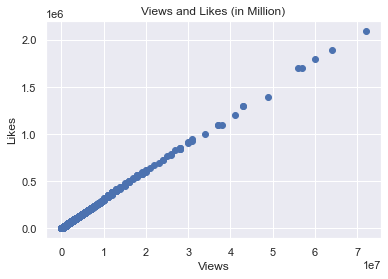

In [33]:
#Correlation between views and likes
plt.scatter(data_cleaned['views'],data_cleaned['likes'])
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Views and Likes (in Million)')
plt.show()

Looks likes a straight line. Which meant that as the views goes up, the likes count goes up too!

### Extracting Year and Month from the Date Column

In [34]:
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.head()

,title,author,date,views,likes
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01,404000,12000
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01,412000,12000
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01,2400,72


In [35]:
#Extracting the month and year from the date column. And the dropping the date column
data_cleaned['year'] = pd.DatetimeIndex(data_cleaned['date']).year
data_cleaned['month'] = pd.DatetimeIndex(data_cleaned['date']).month
data_cleaned = data_cleaned.drop('date',axis=1)
data_cleaned.head()

,title,author,views,likes,year,month
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,404000,12000,2021,12
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,214000,6400,2022,2
2,How play can spark new ideas for your business,Martin Reeves,412000,12000,2021,9
3,Why is China appointing judges to combat clima...,James K. Thornton,427000,12000,2021,10
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2400,72,2021,10


In [37]:
#Rearranging the Columns
data_cleaned.columns.values

array(['title', 'author', 'views', 'likes', 'year', 'month'], dtype=object)

In [38]:
data_cleaned = data_cleaned[['title', 'author', 'month','year','likes','views']]
data_cleaned.head()

,title,author,month,year,likes,views
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,12,2021,12000,404000
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2,2022,6400,214000
2,How play can spark new ideas for your business,Martin Reeves,9,2021,12000,412000
3,Why is China appointing judges to combat clima...,James K. Thornton,10,2021,12000,427000
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,10,2021,72,2400
